<a href="https://colab.research.google.com/github/TNK443/RecPadroes/blob/main/01_Regress%C3%A3o_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolvendo um Problema de Regressão**

1) Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

2) Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

3) Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

4) Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.


In [1]:
# ================================================================================
#                               BIBLIOTECAS
# ================================================================================
import matplotlib.pyplot as plt
import numpy as np


# ================================================================================

## 1) Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

In [2]:
# ================================================================================
#                                 CODIGO I
# ================================================================================

# CARREGANDO A BASE ESCOLHIDA
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print('=' * 100)

print('-' * 60)
print("[SKLEARN.DATASETS.LOAD_DIABETES]")
print("Load and return the diabetes dataset (regression).")
print()
print(diabetes.keys())
print()
print('-' * 60)

print('=' * 100)
# ================================================================================

------------------------------------------------------------
[SKLEARN.DATASETS.LOAD_DIABETES]
Load and return the diabetes dataset (regression).

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

------------------------------------------------------------


----------------------------------------------------------------------------------------------------

DIMENSAO:  0



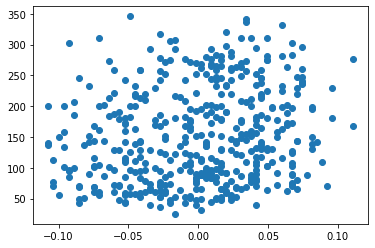


DIMENSAO:  1



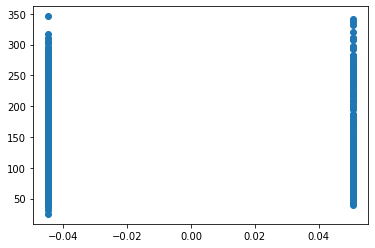


DIMENSAO:  2



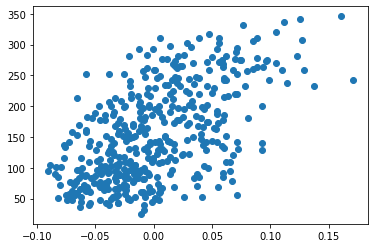


DIMENSAO:  3



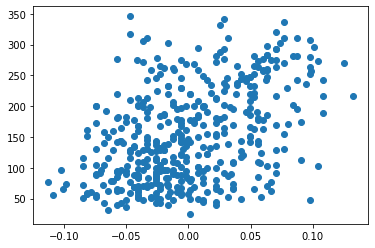


DIMENSAO:  4



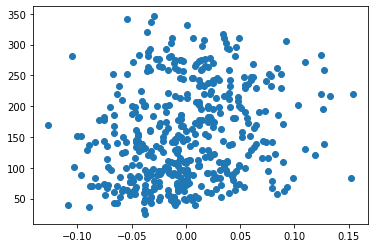


DIMENSAO:  5



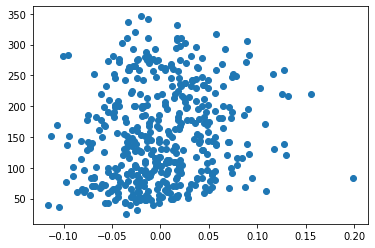


DIMENSAO:  6



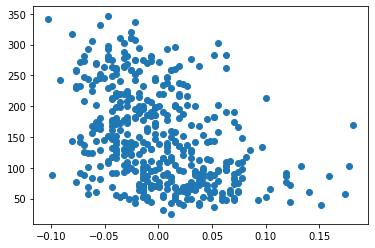


DIMENSAO:  7



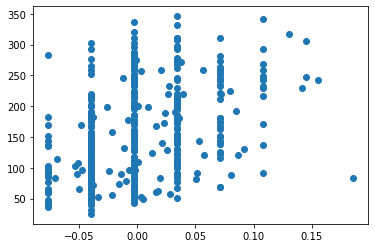


DIMENSAO:  8



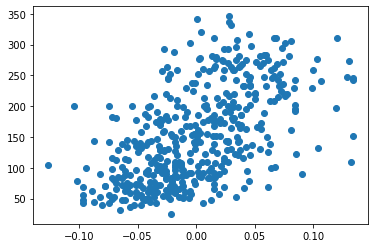


DIMENSAO:  9



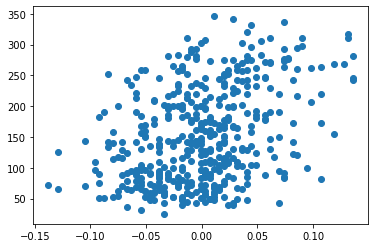

----------------------------------------------------------------------------------------------------


In [22]:
# ================================================================================
#                                 CODIGO II
# ================================================================================
# DEMONSTRANDO O CONTEUDO E DIMENSOES DA BASE
# --------------------------------------------------------------------------------
X, y = diabetes.data, diabetes.target
X.shape, y.shape
# --------------------------------------------------------------------------------
print('-' * 100)
# --------------------------------------------------------------------------------
for i in range(X.shape[1]):
    print()
    print("DIMENSAO: ",i)
    print()
    plt.scatter(X[:,i], y)
    plt.show()
# --------------------------------------------------------------------------------
print('-' * 100)
# ================================================================================

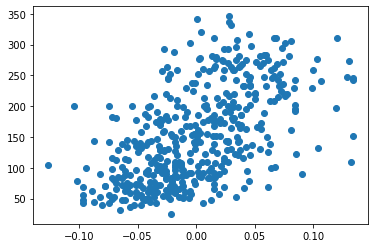

In [4]:
# --------------------------------------------------------------------------------
# FOI ESCOLHIDO INICIALMENTE A DIMESAO 8 (X8) PARA VERIFICAR O COMPORTAMENTO DA REGRESSAO
# --------------------------------------------------------------------------------
X8 = X[:,8:9]
plt.scatter(X8, y)
plt.show()
# --------------------------------------------------------------------------------

In [5]:
# --------------------------------------------------------------------------------
# REGRESSAO SOMENTE DA DIMENTSSAO 8
# --------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X8, y)

print('-' * 60)
print("Intercept(w0 / b):", modelo.intercept_)
print("Coef(w1 / a):", modelo.coef_)
print('-' * 60)
# --------------------------------------------------------------------------------

------------------------------------------------------------
Intercept(w0 / b): 152.13348416289628
Coef(w1 / a): [916.13872282]
------------------------------------------------------------


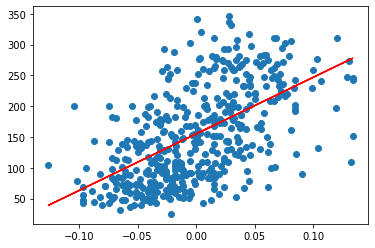

In [7]:
# --------------------------------------------------------------------------------
# COMPORTAMENTO/GRAFICO DA REGRESSAO DA DIMENTSSAO 8
# COM BASE EM UMA FUNCAO LINEAR
# --------------------------------------------------------------------------------
def modelo_linear(X, a, b):
    y = a*X + b
    return y
                          # a    b
ypred = modelo_linear(X8, 920, 155)

# plt.figure(figsize=(15,10))
plt.scatter(X8, y)
plt.plot(X8, ypred, 'r')
plt.show()
# --------------------------------------------------------------------------------

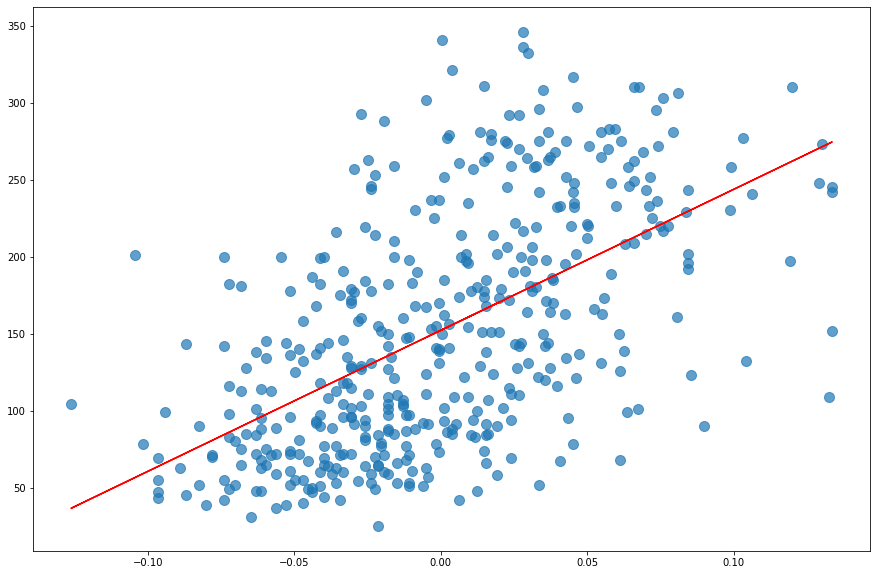

In [8]:
# --------------------------------------------------------------------------------
# COMPORTAMENTO/GRAFICO DA REGRESSAO DA DIMENTSSAO 8
# COM BASE NO LinearRegression()
# --------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15,10))
plt.scatter(X8, y, alpha=0.7, linewidths=1, s=100)

modelo = LinearRegression()
modelo.fit(X8, y)
ypred = modelo.predict(X8)
plt.plot(X8, ypred, 'r')

plt.show()
# --------------------------------------------------------------------------------

## 2) Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

In [9]:
# ================================================================================
#                                 CODIGO III
# ================================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print('-' * 100)
print("RESULTADO POS TREINAMENTO DA BASE [SKLEARN.DATASETS.LOAD_DIABETES] COM O LINEARREGRESSION()")
print()
print("Intercept(w0 / b) =", modelo.intercept_)
print()
print("Coef(w1 / a) =", modelo.coef_)
print()
print('-' * 100)
# ================================================================================

----------------------------------------------------------------------------------------------------
RESULTADO POS TREINAMENTO DA BASE [SKLEARN.DATASETS.LOAD_DIABETES] COM O LINEARREGRESSION()

Intercept(w0 / b) = 152.1334841628965

Coef(w1 / a) = [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

----------------------------------------------------------------------------------------------------


## 3) Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado;

In [23]:
# ================================================================================
#                                 CODIGO IV
# ================================================================================
print('-' * 100)
print()
print("MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.LOAD_DIABETES]")
print()
print("MSE =", mean_squared_error(y, ypred))
print()
print('-' * 100)
# ================================================================================

----------------------------------------------------------------------------------------------------

MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.LOAD_DIABETES]

MSE = 2859.6903987680657

----------------------------------------------------------------------------------------------------


## 4) Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.


GRÁFICO (2D) O MSE EM FUNÇÃO DO ATRIBUTO INTERCEPT_ DA CLASSE LINEARREGRESSION



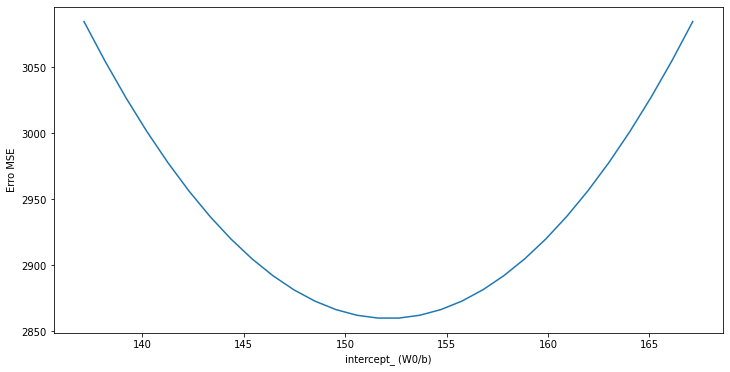

In [27]:
# --------------------------------------------------------------------------------
plt.figure(figsize=(12,6))

def z_function(W0, W1):
    modelo = LinearRegression()
    modelo.fit(X, y)
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.intercept_ = W0[j][k]
            ypred = modelo.predict(X)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

print('=' * 100)
print()
print("GRÁFICO (2D) O MSE EM FUNÇÃO DO ATRIBUTO INTERCEPT_ DA CLASSE LINEARREGRESSION")
print()

coef = modelo.coef_
intercept = modelo.intercept_
delta = 15
linspace = 30

w0 = np.linspace((intercept-delta), (intercept+delta), linspace)
w1 = np.linspace(coef, coef, linspace)

W0, W1 = np.meshgrid(w0,w1)

Erro = z_function(W0, W1)

plt.ylabel("Erro MSE")
plt.xlabel("intercept_ (W0/b)")

i=8
plt.plot(W0[i,:], Erro[i,:])
plt.show()

print()
print('=' * 100)
# --------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.LOAD_DIABETES]

MSE = 2859.6903987680657

----------------------------------------------------------------------------------------------------

DIMENSAO 8 (X8) COM PREDICT DE TODA A BASE



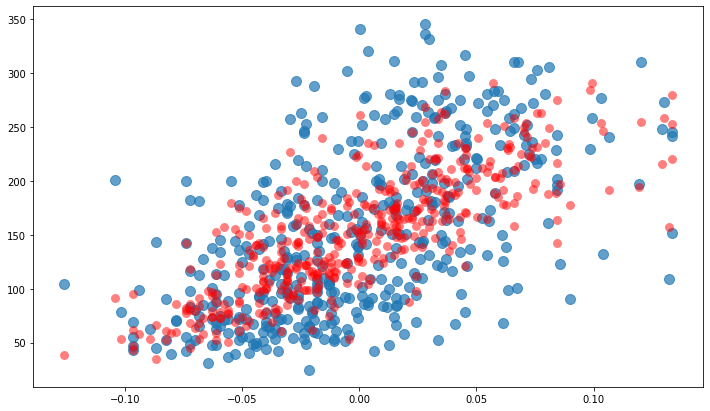

In [26]:
# --------------------------------------------------------------------------------
plt.figure(figsize=(12,7))
plt.scatter(X8, y, alpha=0.7, linewidths=1, s=100)

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print('-' * 100)
print()
print("MSE (Erro Quadrático Médio) da BASE [SKLEARN.DATASETS.LOAD_DIABETES]")
print()
print("MSE =", mean_squared_error(y, ypred))
print()
print('-' * 100)
print()
print("DIMENSAO 8 (X8) COM PREDICT DE TODA A BASE")
print()
plt.scatter(X8, ypred, alpha=0.5, linewidths=0, color='red', s=80)

plt.show()
# --------------------------------------------------------------------------------